In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [24]:
#loading the Iris dataset
iris = load_iris(as_frame=True)
X = iris.data                    
y = iris.target                  
class_names = iris.target_names

In [26]:
#train and test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [28]:
#scale featuring
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [30]:
#training the random forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42, n_jobs=-1 )
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [31]:
#evaluating
y_pred = rf_model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Random Forest accuracy (Iris): {acc:.2f}\n")
print(classification_report(y_test, y_pred, target_names=class_names))

Random Forest accuracy (Iris): 0.92

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



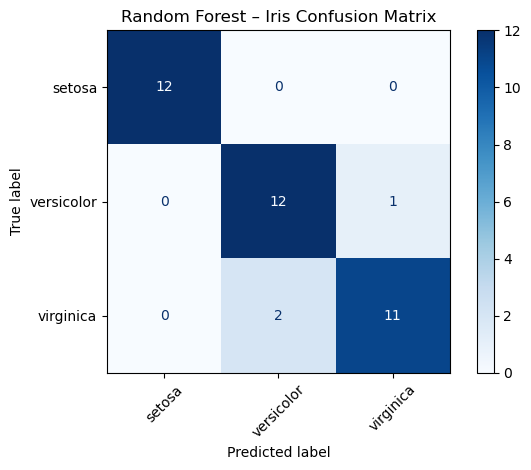

In [33]:
#confusion‑matrix plotting
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, cmap='Blues', xticks_rotation=45)
plt.title("Random Forest – Iris Confusion Matrix")
plt.tight_layout()
plt.show()

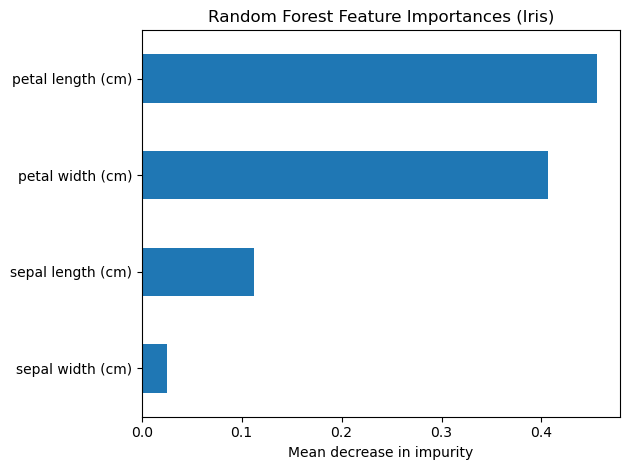

In [35]:
# feature‑importance bar chart
importances = pd.Series(rf_model.feature_importances_, index=iris.feature_names)
importances.sort_values().plot.barh()
plt.title("Random Forest Feature Importances (Iris)")
plt.xlabel("Mean decrease in impurity")
plt.tight_layout()
plt.show()